<a href="https://colab.research.google.com/github/LenaVolzhina/playing-with-kaggle/blob/master/download_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# [Dataset](https://www.kaggle.com/c/understanding_cloud_organization/data): download, unpack, move to drive




In [ ]:
!mkdir -p /root/.kaggle
!cp "/content/drive/My Drive/Colab Notebooks/kaggle.json" /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [22]:
# without upgrade downloaded only 40 files
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=ea29ea45ab333f2cc674e7d925b60a44cc7607234e16be2d536dd4bc4b35e6e1
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [23]:
!kaggle -v

Kaggle API 1.5.6


In [24]:
!kaggle competitions download understanding_cloud_organization -p /content/data

100% 5.80G/5.80G [01:23<00:00, 55.5MB/s]
100% 5.80G/5.80G [01:23<00:00, 74.5MB/s]


In [25]:
!ls /content/data

understanding_cloud_organization.zip


In [ ]:
 !unzip /content/data/understanding_cloud_organization.zip -d /content/data/unzipped

In [28]:
!cp -r /content/data/unzipped/* "/content/drive/My Drive/Colab Notebooks/kaggle clouds/data/"

# A quick look into the data


In [43]:
path_to_data = '/content/drive/My Drive/Colab Notebooks/kaggle clouds/data/'
!ls "{path_to_data}"

sample_submission.csv  test_images  train.csv  train_images


In [44]:
import pandas as pd

train_data = pd.read_csv(path_to_data + 'train.csv')
print(train_data.shape)
train_data.head()

(22184, 2)


,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [46]:
train_data['Image'] = train_data['Image_Label'].apply(lambda s: s.split('_')[0])
train_data['Label'] = train_data['Image_Label'].apply(lambda s: s.split('_')[1])

In [62]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

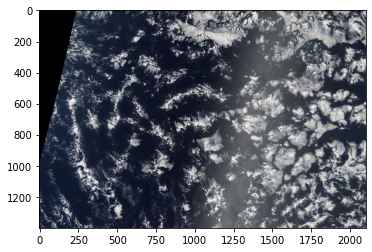

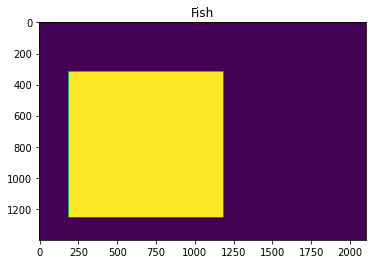

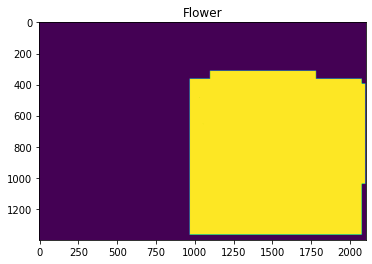

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [94]:
labels = ['Fish', 'Flower', 'Gravel', 'Sugar']

def get_mask_from_rle(rle, h, w):
    mask = np.zeros(shape=h * w)
    splitted = list(map(int, rle.split()))
    for start, length in zip(splitted[::2], splitted[1::2]):
        start -= 1
        mask[start:start + length] = 1
    
    return mask.reshape((w, h)).T


def show_image(image):
    img = mpimg.imread('{}train_images/{}'.format(path_to_data, image))
    h, w, _ = img.shape
    plt.imshow(img)

    data = train_data[train_data.Image == image]
    for label in labels:
        plt.figure()
        rle = data[data.Label == label]['EncodedPixels'].values[0]
        if isinstance(rle, str):
            mask = get_mask_from_rle(rle, h, w)
            plt.imshow(mask)
            plt.title(label)

show_image('0011165.jpg')

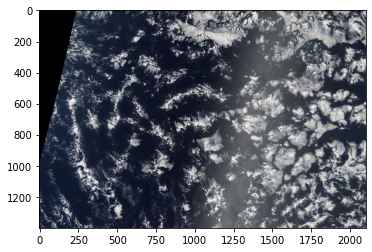

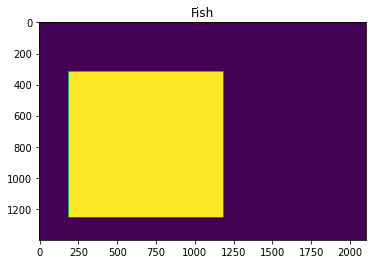

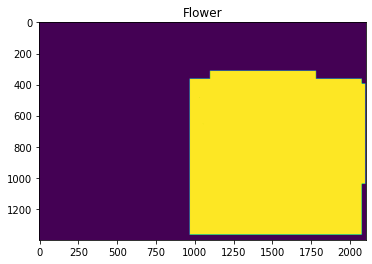

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [97]:
def show_image2(image):
    img = mpimg.imread('{}train_images/{}'.format(path_to_data, image))
    h, w, _ = img.shape
    plt.imshow(img)

    data = train_data[train_data.Image == image]
    for label in labels:
        plt.figure()
        rle = data[data.Label == label]['EncodedPixels'].values[0]
        if isinstance(rle, str):
            mask = get_mask_from_rle(rle, h, w)
            plt.imshow(mask)
            plt.title(label)

show_image2('0011165.jpg')